# Transfer Learning

## Import Packages

In [1]:
!pip uninstall ml_project_util -y
!pip install git+https://github.com/aris-gk3/ml_project_util.git

import tensorflow as tf
import os
from tensorflow.keras import layers, models # type: ignore
from tensorflow.keras.applications import VGG16 # type: ignore
# Local Packages
from ml_project_util.path import path_definition
from ml_project_util.train import train, freeze_layers, unfreeze_head, unfreeze_block
from ml_project_util.quantization_util import quant_model, quant_bw_search
from ml_project_util.model_evaluation import model_evaluation_precise

  Cloning https://github.com/aris-gk3/ml_project_util.git to /tmp/pip-req-build-2b3hbeor
  Running command git clone --filter=blob:none --quiet https://github.com/aris-gk3/ml_project_util.git /tmp/pip-req-build-2b3hbeor
  Resolved https://github.com/aris-gk3/ml_project_util.git to commit 1921b62d0d3eb376f616747288cd373b403506c7
  Preparing metadata (setup.py) ... done
  Created wheel for ml_project_util: filename=ml_project_util-0.1-py3-none-any.whl size=22366 sha256=22838955ed765bb7b72c57f36166e5bf2cccb4c5b55f8a6161b0078442b6ad03
  Stored in directory: /tmp/pip-ephem-wheel-cache-kc5ljmvs/wheels/9b/33/7a/e8e8f55a4c6aa39df26369c48b9e3497c6dde4c7663912f8ef
Successfully built ml_project_util


2025-06-14 09:13:55.137397: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749892435.378070      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749892435.443736      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Define Variable Paths

In [2]:
dict = path_definition(ds_rel_path='oxford-flowers-17-restructured') # path_definition.config to read
BASE_PATH = dict['BASE_PATH']
PATH_DATASET = dict['PATH_DATASET']
PATH_TEST = dict['PATH_TEST']
PATH_RAWDATA = dict['PATH_RAWDATA']
PATH_JOINEDDATA = dict['PATH_JOINEDDATA']
PATH_SAVEDMODELS = dict['PATH_SAVEDMODELS']

ds_rel_path set to: oxford-flowers-17-restructured


## Define the Model

In [3]:
model_name = 'OF2_P1_008_val0.3397'
model_path = '/kaggle/input/of2_p1_008_val0.3397/keras/default/1/OF2_P1_008_val0.3397.keras'
model = tf.keras.models.load_model(model_path)

I0000 00:00:1749892451.842736      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


## Train the Model

- block1_conv1 (Conv2D), Trainable: False
- block1_conv2 (Conv2D), Trainable: False
- block1_pool (MaxPooling2D), Trainable: False
- block2_conv1 (Conv2D), Trainable: False
- block2_conv2 (Conv2D), Trainable: False
- block2_pool (MaxPooling2D), Trainable: False
- block3_conv1 (Conv2D), Trainable: False
- block3_conv2 (Conv2D), Trainable: False
- block3_conv3 (Conv2D), Trainable: False
- block3_pool (MaxPooling2D), Trainable: False
- block4_conv1 (Conv2D), Trainable: False
- block4_conv2 (Conv2D), Trainable: False
- block4_conv3 (Conv2D), Trainable: False
- block4_pool (MaxPooling2D), Trainable: False
- block5_conv1 (Conv2D), Trainable: False
- block5_conv2 (Conv2D), Trainable: False
- block5_conv3 (Conv2D), Trainable: False
- block5_pool (MaxPooling2D), Trainable: False
- global_average_pooling2d (GlobalAveragePooling2D), Trainable: False
- dense (Dense), Trainable: False
- dropout (Dropout), Trainable: False
- dense_1 (Dense), Trainable: False


- block1_conv1 (Conv2D), Trainable: Fal

I0000 00:00:1749892460.552302     100 service.cc:148] XLA service 0x7d9408002d60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749892460.553226     100 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1749892461.040487     100 cuda_dnn.cc:529] Loaded cuDNN version 90300


 2/26 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.8594 - loss: 0.4510 

I0000 00:00:1749892470.362931     100 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 609ms/step - accuracy: 0.8017 - loss: 0.7272
Epoch 1: saving model to /kaggle/working/SavedModels/OF2/OF2_P1_008_val0.3397_001_val0.4416.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 35s 851ms/step - accuracy: 0.8012 - loss: 0.7279 - val_accuracy: 0.8824 - val_loss: 0.4416
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step - accuracy: 0.8667 - loss: 0.4075
Epoch 2: saving model to /kaggle/working/SavedModels/OF2/OF2_P1_008_val0.3397_002_val0.3338.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 14s 509ms/step - accuracy: 0.8667 - loss: 0.4081 - val_accuracy: 0.9069 - val_loss: 0.3338
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.9057 - loss: 0.3332
Epoch 3: saving model to /kaggle/working/SavedModels/OF2/OF2_P1_008_val0.3397_003_val0.3396.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 14s 508ms/step - accuracy: 0.9055 - loss: 0.3341 - val_accuracy: 0.9069 - val_loss: 0.3396
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - accuracy: 0.9133 - loss: 0.2517
Epoch 4: saving mod

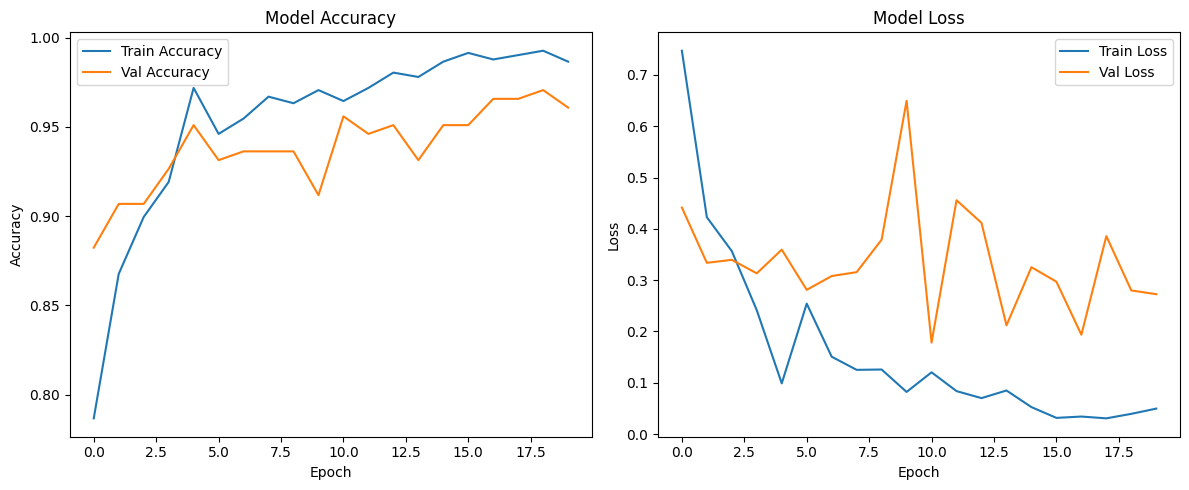

In [4]:
epochs = 20
lr = 1e-4
optimizer = 'Adam'

freeze_layers(model, verbose=1)
unfreeze_head(model, verbose=1)
unfreeze_block(model, verbose=1)
train(model, epochs, lr, optimizer, model_name, is_binary=0, plot=True)

In [5]:
model_evaluation_precise(model)

Found 340 files belonging to 17 classes.
Start evaluating batches
Batch Number: 10
Precise test accuracy: 0.95294
Precise test loss: 0.24029


(0.9529412, 0.24028545778025598)

In [6]:
model_name = 'OF2_P1_008_val0.3397'
model_path = '/kaggle/input/of2_p1_008_val0.3397/keras/default/1/OF2_P1_008_val0.3397.keras'
model = tf.keras.models.load_model(model_path)

- block1_conv1 (Conv2D), Trainable: False
- block1_conv2 (Conv2D), Trainable: False
- block1_pool (MaxPooling2D), Trainable: False
- block2_conv1 (Conv2D), Trainable: False
- block2_conv2 (Conv2D), Trainable: False
- block2_pool (MaxPooling2D), Trainable: False
- block3_conv1 (Conv2D), Trainable: False
- block3_conv2 (Conv2D), Trainable: False
- block3_conv3 (Conv2D), Trainable: False
- block3_pool (MaxPooling2D), Trainable: False
- block4_conv1 (Conv2D), Trainable: False
- block4_conv2 (Conv2D), Trainable: False
- block4_conv3 (Conv2D), Trainable: False
- block4_pool (MaxPooling2D), Trainable: False
- block5_conv1 (Conv2D), Trainable: False
- block5_conv2 (Conv2D), Trainable: False
- block5_conv3 (Conv2D), Trainable: False
- block5_pool (MaxPooling2D), Trainable: False
- global_average_pooling2d (GlobalAveragePooling2D), Trainable: False
- dense (Dense), Trainable: False
- dropout (Dropout), Trainable: False
- dense_1 (Dense), Trainable: False


- block1_conv1 (Conv2D), Trainable: Fal

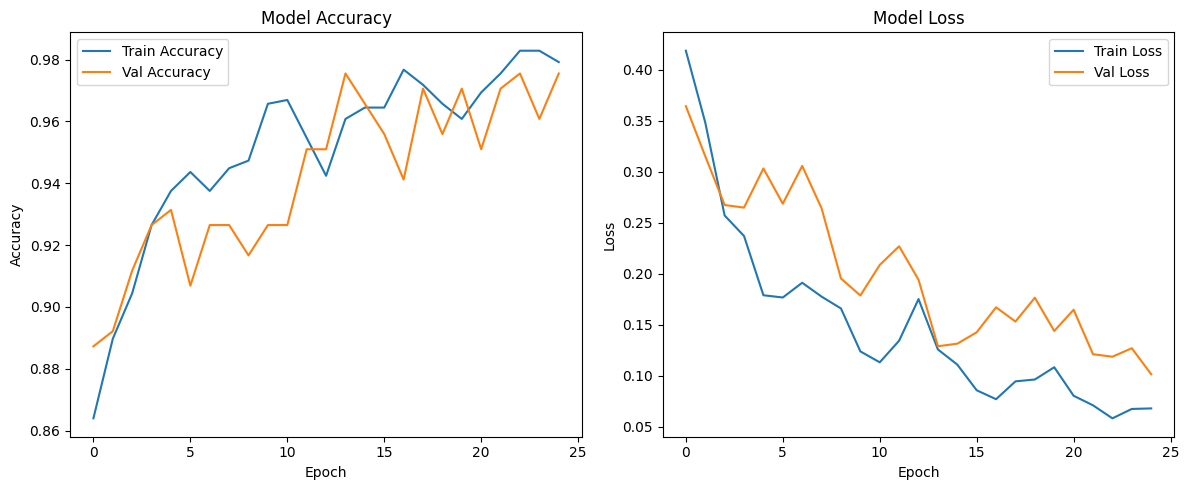

In [7]:
epochs = 25
lr = 1e-5
optimizer = 'Adam'

freeze_layers(model, verbose=1)
unfreeze_head(model, verbose=1)
unfreeze_block(model, verbose=1)
train(model, epochs, lr, optimizer, model_name, is_binary=0, plot=True)

In [8]:
model_evaluation_precise(model)

Found 340 files belonging to 17 classes.
Start evaluating batches
Batch Number: 10
Precise test accuracy: 0.95294
Precise test loss: 0.28112


(0.9529412, 0.2811191512381329)

In [9]:
model_name = 'OF2_P1_008_val0.3397'
model_path = '/kaggle/input/of2_p1_008_val0.3397/keras/default/1/OF2_P1_008_val0.3397.keras'
model = tf.keras.models.load_model(model_path)

- block1_conv1 (Conv2D), Trainable: False
- block1_conv2 (Conv2D), Trainable: False
- block1_pool (MaxPooling2D), Trainable: False
- block2_conv1 (Conv2D), Trainable: False
- block2_conv2 (Conv2D), Trainable: False
- block2_pool (MaxPooling2D), Trainable: False
- block3_conv1 (Conv2D), Trainable: False
- block3_conv2 (Conv2D), Trainable: False
- block3_conv3 (Conv2D), Trainable: False
- block3_pool (MaxPooling2D), Trainable: False
- block4_conv1 (Conv2D), Trainable: False
- block4_conv2 (Conv2D), Trainable: False
- block4_conv3 (Conv2D), Trainable: False
- block4_pool (MaxPooling2D), Trainable: False
- block5_conv1 (Conv2D), Trainable: False
- block5_conv2 (Conv2D), Trainable: False
- block5_conv3 (Conv2D), Trainable: False
- block5_pool (MaxPooling2D), Trainable: False
- global_average_pooling2d (GlobalAveragePooling2D), Trainable: False
- dense (Dense), Trainable: False
- dropout (Dropout), Trainable: False
- dense_1 (Dense), Trainable: False


- block1_conv1 (Conv2D), Trainable: Fal

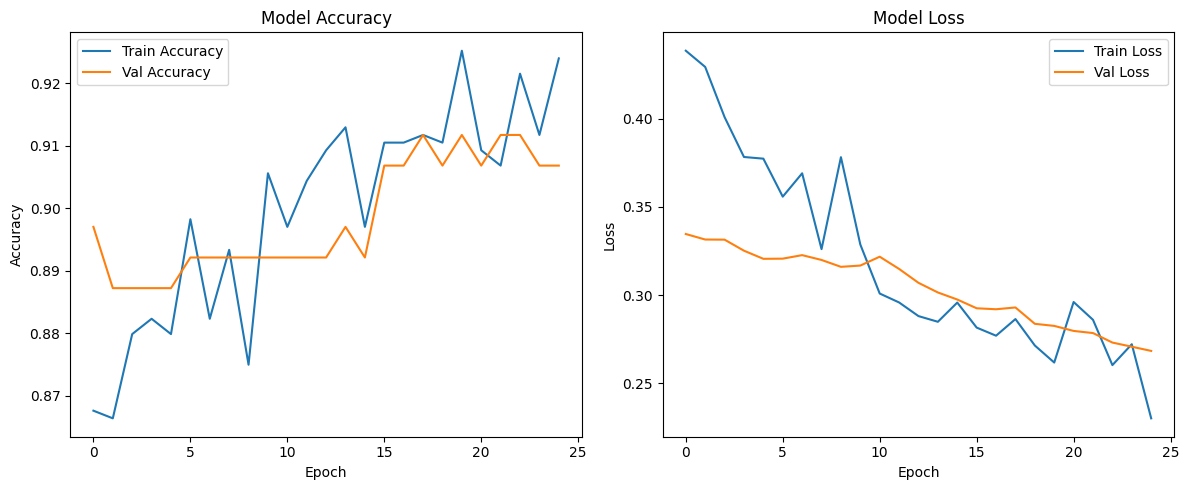

In [10]:
epochs = 25
lr = 1e-6
optimizer = 'Adam'

freeze_layers(model, verbose=1)
unfreeze_head(model, verbose=1)
unfreeze_block(model, verbose=1)
train(model, epochs, lr, optimizer, model_name, is_binary=0, plot=True)

In [11]:
model_evaluation_precise(model)

Found 340 files belonging to 17 classes.
Start evaluating batches
Batch Number: 10
Precise test accuracy: 0.91176
Precise test loss: 0.36047


(0.9117647, 0.36047142042833213)

---

## PTQ & Evaluate

In [12]:
# model_name = 'of1_p1_003_val0.4768'
# # model_path = f"{PATH_SAVEDMODELS}/{model_name[:3]}/{model_name}.keras"
# model_path = '/kaggle/input/of1_p1_003_val0.4768/keras/default/1/OF1_P1_003_val0.4768.keras'
# model = tf.keras.models.load_model(model_path)

In [13]:
# %%time
# quant_bw_search(model, model_name, range(9,20))

In [14]:
# model_evaluation_precise(model)